<a href="https://colab.research.google.com/github/NavyaPatil1011/Deep_learning_and_gen_ai_lab/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000,)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000,)


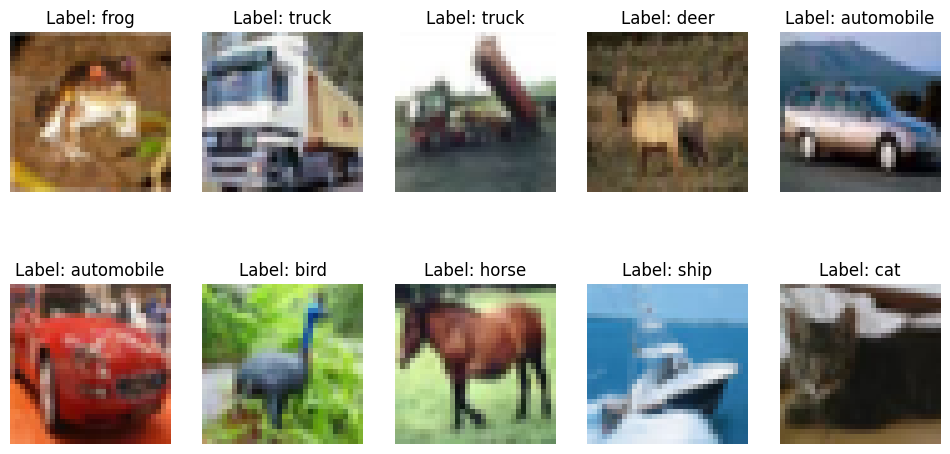

New shape of X_train: (50000, 3072)
New shape of X_test: (10000, 3072)
Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.2643 - loss: 2.0507 - val_accuracy: 0.3698 - val_loss: 1.7528
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.3742 - loss: 1.7340 - val_accuracy: 0.3889 - val_loss: 1.7068
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4185 - loss: 1.6244 - val_accuracy: 0.4155 - val_loss: 1.6561
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4426 - loss: 1.5621 - val_accuracy: 0.4390 - val_loss: 1.5799
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4614 - loss: 1.5036 - val_accuracy: 0.4366 - val_loss: 1.5771
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.4699 - loss: 1.4764 - val_accuracy: 0.4582 - val_loss: 1.5199
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4805 - loss: 1.4482 - val_accuracy: 0.4687 - val_loss: 1.5015
Epoch 8/100


Model: "DFF-CIFAR10-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,216,672 (19.90 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,477,782 (13.27 MB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

    airplane       0.78      0.76      0.77      5000
  automobile       0.89      0.86      0.87      5000
        bird       0.74      0.65      0.69      5000
         cat       0.71      0.72      0.72      5000
        deer       0.64      0.80      0.71      5000
         dog       0.76      0.70      0.73      5000
        frog       0.82      0.78      0.80      5000
       horse       0.81      0.84      0.82      5000
        ship       0.81      0.84      0.83      5000
       truck       0.85      0.83      0.84      5000

    accuracy                           0.78     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.78      0.78      0.78     50000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

    airplane       0.52      0.52      0.52      1000
  automobile       0.60      0.5

In [4]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten labels to 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Display first 10 images and labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n])
        axs[i, j].set_title(f"Label: {class_names[y_train[n]]}")
        axs[i, j].axis('off')
        n += 1
plt.show()

# Normalize input data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten input data (32x32x3 = 3072)
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

# Define Deep Feedforward Neural Network
model = Sequential(name="DFF-CIFAR10-Model")
model.add(Input(shape=(3072,), name='Input-Layer'))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-1'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-2'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name='Hidden-Layer-3'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          validation_split=0.2,
          shuffle=True,
          validation_freq=1)

# Predictions
pred_labels_tr = np.argmax(model.predict(X_train), axis=1)
pred_labels_te = np.argmax(model.predict(X_test), axis=1)

# Model Summary
print("\nModel Summary")
model.summary()

# Evaluation
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr, target_names=class_names))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te, target_names=class_names))
